### Bernstein Vazirani Algorithm

Given a function, we want to find **a** such that f(x) = **a**.x mod 2  
Check out - https://www.youtube.com/watch?v=sqJIpHYl7oo

---
Done as part of the NPTEL Course - Introduction to Quantum Computing: Quantum Algorithms and Qiskit
https://onlinecourses.nptel.ac.in/noc21_cs103/preview

In [10]:
# Importingstandard Qiskit libraries
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import plot_histogram
from ibm_quantum_widgets import *

from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi

# Loading the IBM Q Account
provider = IBMQ.load_account()
print("Process Complete!")

ibmqfactory.load_account:WARNING:2021-10-20 13:29:54,570: Credentials are already in use. The existing account in the session will be replaced.


Process Complete!


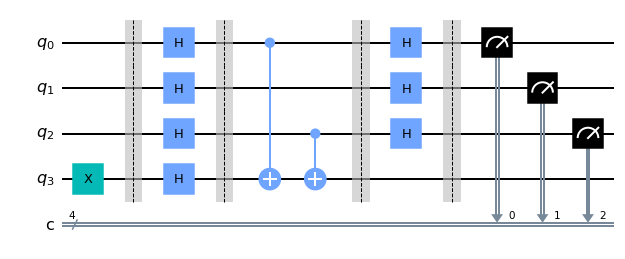

In [15]:
"""
We are given a Quantum Oracle with a 'hidden number' a
With 1 query we need to find a. Takes n queries in the classical scenario, 
where n is the number of bits it takes to store a
"""

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

"""
Making the input |0001>
"""
circuit.x(qreg_q[3])
circuit.barrier(qreg_q[3], qreg_q[0], qreg_q[1], qreg_q[2])


"""
Step 1 - Hadamard Transform
Setting the state to |+++->
"""
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.barrier(qreg_q[3], qreg_q[0], qreg_q[1], qreg_q[2])

"""
Step 2 - Implementation of the Oracle
Change this according to the 'a' you want to store. Add a CNOT where you want to store 1
This won't be visible to the party that is trying to guess 'a'
For now, a = 101
"""
circuit.cx(qreg_q[0], qreg_q[3])
circuit.cx(qreg_q[2], qreg_q[3])

circuit.barrier(qreg_q[3], qreg_q[0], qreg_q[1], qreg_q[2])


"""
Step 3 - Hadamard on Input Qubits
"""
circuit.h(qreg_q[0])
circuit.h(qreg_q[1])
circuit.h(qreg_q[2])
circuit.barrier()

          
"""
Step 4 - Measure the first n qubits
"""
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.draw()

Counts: {'0101': 1024}


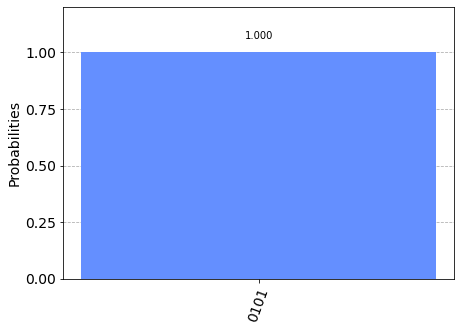

In [16]:
backend = Aer.get_backend('qasm_simulator')
job_simulator = execute(circuit, backend, shots = 1024)

results_simulator = job_simulator.result()
counts = results_simulator.get_counts(circuit)

print("Counts:", counts)
plot_histogram(counts)